In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
csv_files = ["D:/B. Sc (Hon's) Computer Science/Year 3/CN6000 - Mental Wealth; Professional Life 3 (Project)/Final Code/Dataset/dataset1.csv", "D:/B. Sc (Hon's) Computer Science/Year 3/CN6000 - Mental Wealth; Professional Life 3 (Project)/Final Code/Dataset/dataset2.csv", "D:/B. Sc (Hon's) Computer Science/Year 3/CN6000 - Mental Wealth; Professional Life 3 (Project)/Final Code/Dataset/dataset3.csv", "D:/B. Sc (Hon's) Computer Science/Year 3/CN6000 - Mental Wealth; Professional Life 3 (Project)/Final Code/Dataset/dataset4.csv", "D:/B. Sc (Hon's) Computer Science/Year 3/CN6000 - Mental Wealth; Professional Life 3 (Project)/Final Code/Dataset/dataset5.csv", ]

In [158]:
dfs = [pd.read_csv(filename) for filename in csv_files]

In [159]:
df = pd.concat(dfs)

In [160]:
df = df.drop(columns=['Time_Stamp', 'Mx', 'My', 'Mz'])

In [161]:
df = df.loc[df['Activity'].isin(['Walking', 'Running', 'Sitting', 'Standing'])]

In [162]:
df.head()

,Ax,Ay,Az,Gx,Gy,Gz,Activity
18453,-17.025434,18.441952,3.731975,0.978912,-2.061976,-5.418680,Running
18454,-10.487668,19.245552,6.660350,1.186300,-3.510948,-5.768095,Running
18455,-10.909899,19.286413,18.496431,0.776104,-5.456248,-5.575367,Running
18456,-3.772836,19.517958,11.672638,-0.559553,-5.466633,-4.932126,Running
18457,-1.934089,18.074202,9.752169,-1.727832,-4.200004,-4.378682,Running


In [163]:
df.tail()

,Ax,Ay,Az,Gx,Gy,Gz,Activity
159987,4.222308,4.998668,3.364226,0.490525,-1.331381,0.348193,Walking
159988,4.235928,5.393658,3.418707,0.479529,-0.257785,0.283747,Walking
159989,3.827318,5.952092,3.800077,0.470672,0.409585,0.190285,Walking
159990,3.514050,6.483285,4.045243,0.520152,0.905608,0.044899,Walking
159991,2.996476,7.409469,4.331271,0.582155,1.247998,-0.090713,Walking


In [164]:
df.shape

(518250, 7)

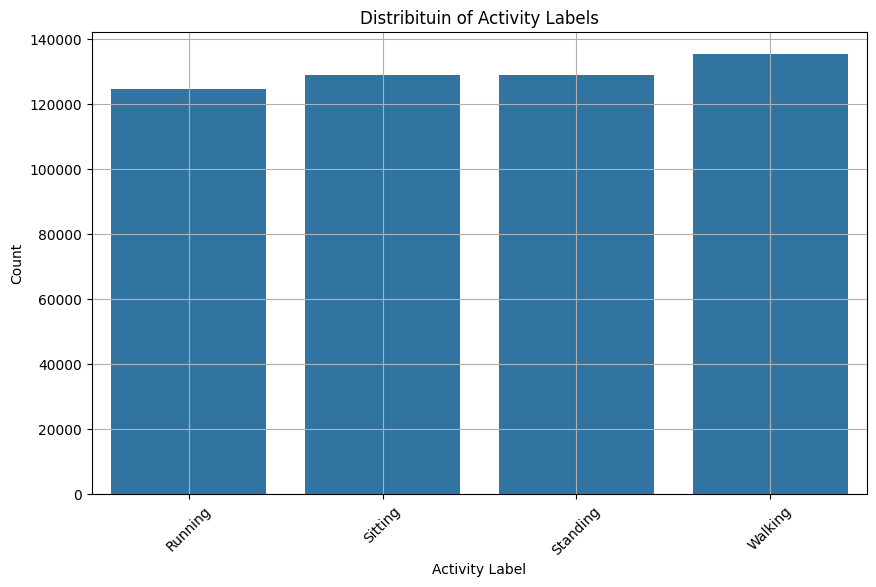

In [165]:
plt.figure(figsize = (10, 6))
sns.countplot(x = 'Activity', data = df)
plt.title('Distribituin of Activity Labels')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

In [166]:
from sklearn.preprocessing import LabelEncoder

In [167]:
encoder = LabelEncoder()
df['Activity'] = encoder.fit_transform(df['Activity'])

In [168]:
from sklearn.preprocessing import StandardScaler

In [169]:
features = df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']]

In [170]:
scaler = StandardScaler()
df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']] = scaler.fit_transform(features)

In [171]:
print(df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']].mean())
print(df[['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']].std())

Ax   -6.361637e-17
Ay    1.210905e-16
Az    2.105921e-17
Gx    6.855212e-18
Gy   -9.597297e-20
Gz    1.501634e-17
dtype: float64
Ax    1.000001
Ay    1.000001
Az    1.000001
Gx    1.000001
Gy    1.000001
Gz    1.000001
dtype: float64


In [172]:
from joblib import dump

In [173]:
dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

In [174]:
dump(encoder, 'Encoder.joblib')

['Encoder.joblib']

In [175]:
import numpy as np
from sklearn.model_selection import train_test_split

In [176]:
window_size = 100
step_size = 50
features_columns = ['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']
label_column = 'Activity'

In [177]:
windows = []
labels = []

In [178]:
for start in range(0, df.shape[0] - window_size + 1, step_size):
    end = start + window_size
    window = df[features_columns][start:end].values
    label = df[label_column][start:end].mode()[0]
    windows.append(window)
    labels.append(label)

In [179]:
X = np.array(windows)
y = np.array(labels)

In [180]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [181]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [182]:
print(f"Training Set: {X_train.shape}")
print(f"Validation Set: {X_val.shape}")
print(f"Testing Set: {X_test.shape}")

Training Set: (6218, 100, 6)
Validation Set: (2073, 100, 6)
Testing Set: (2073, 100, 6)


In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [184]:
num_activities = len(np.unique(y_train))

In [185]:
y_train_encoded = to_categorical(y_train, num_classes=num_activities)
y_val_encoded = to_categorical(y_val, num_classes=num_activities)
y_test_encoded = to_categorical(y_test, num_classes=num_activities)

In [186]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(num_activities, activation='softmax'))

c:\Users\shawo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [187]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [188]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 64)        │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,724 (120.02 KB)

 Trainable params: 30,724 (120.02 KB)

 Non-trainable params: 0 (0.00 B)

In [189]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [190]:
checkpoint = ModelCheckpoint('HAR_Model.keras', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')

In [191]:
history = model.fit(
    X_train, y_train_encoded,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val_encoded),
    callbacks=[checkpoint, early_stopping],
    verbose=1
)

Epoch 1/20
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5345 - loss: 1.0565
Epoch 1: val_accuracy improved from -inf to 0.82200, saving model to HAR_Model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.5374 - loss: 1.0505 - val_accuracy: 0.8220 - val_loss: 0.4249
Epoch 2/20
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8354 - loss: 0.4310
Epoch 2: val_accuracy improved from 0.82200 to 0.86879, saving model to HAR_Model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.8360 - loss: 0.4296 - val_accuracy: 0.8688 - val_loss: 0.2982
Epoch 3/20
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8910 - loss: 0.2988
Epoch 3: val_accuracy improved from 0.86879 to 0.92475, saving model to HAR_Model.keras
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.8913 - loss: 0.2980 - val_accuracy: 0.9247 - val_loss: 0.2399
Epoch 4/20
97/98 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9285 - loss: 0.2157
Epoch 4: val_accuracy did not improve from 0.92475


In [192]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9619 - loss: 0.1119
Test Loss: 0.11225338280200958
Test Accuracy: 0.9623733758926392


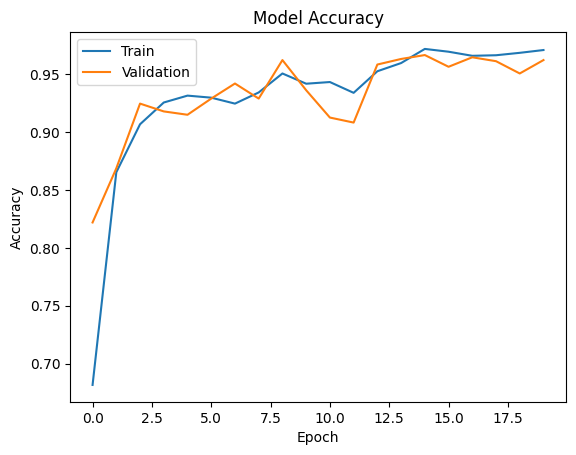

In [193]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

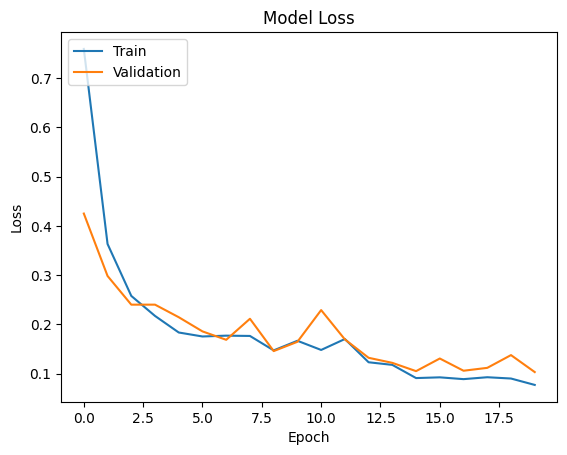

In [194]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [195]:
from tensorflow.keras.models import load_model
model = load_model('HAR_Model.keras')

In [196]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9602 - loss: 0.1317
Test Loss: 0.12437696009874344
Test Accuracy: 0.9652677178382874


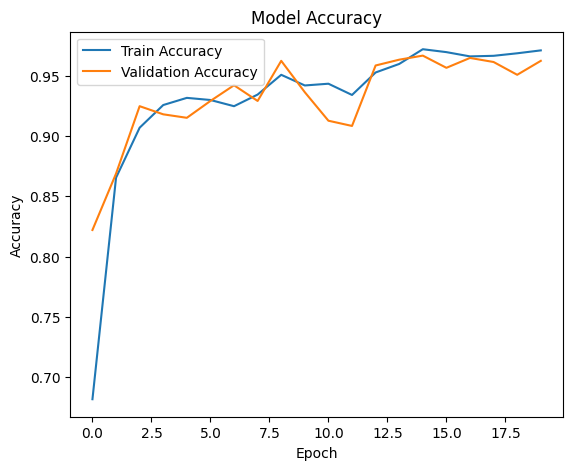

In [197]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

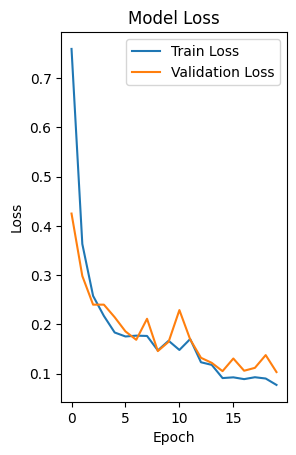

In [198]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()